#### Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

#### Original Data Set

In [26]:
df = pd.read_csv('medical_clean.csv', index_col = 0)
df.isna().sum()

Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
Item1           

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

original Data

In [28]:
df.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


working DataFrame

In [29]:
# Creating a new data frame for adjustments
cln_df = df.copy()

Dropring variables with more than 5 levels

In [30]:
# Viewing levels of categorical variables
obj_var = cln_df.select_dtypes(include=['object'])

# Get unique values for each object column
obj_levels = obj_var.nunique()

# Drop columns with more than 5 unique values
drops = obj_levels[obj_levels > 5].index

# Filter the original DataFrame
cln_df.drop(columns=drops, inplace=True)

In [31]:
cln_df.drop(['Zip','Lat','Lng','Population','Children','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'],axis=1,inplace=True)

In [32]:
cln_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   ReAdmis             10000 non-null  object 
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Soft_drink          10000 non-null  object 
 11  Initial_admin       10000 non-null  object 
 12  HighBlood           10000 non-null  object 
 13  Stroke              10000 non-null  object 
 14  Complication_risk   10000 non-null  object 
 15  Overweight          10000 non-null  object 
 16  Arth

In [33]:
categorical_cols = cln_df.select_dtypes(['object']).columns

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_columns = encoder.get_feature_names_out(categorical_cols)


encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=cln_df.index).astype('category')
df_without_categorical = cln_df.drop(columns=categorical_cols).astype('float') # Droping categorical features from working data frame
cln_df_enc = pd.concat([df_without_categorical, encoded_df], axis=1)
cln_df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Age                                  10000 non-null  float64 
 1   Income                               10000 non-null  float64 
 2   VitD_levels                          10000 non-null  float64 
 3   Doc_visits                           10000 non-null  float64 
 4   Full_meals_eaten                     10000 non-null  float64 
 5   vitD_supp                            10000 non-null  float64 
 6   Initial_days                         10000 non-null  float64 
 7   TotalCharge                          10000 non-null  float64 
 8   Additional_charges                   10000 non-null  float64 
 9   Area_Suburban                        10000 non-null  category
 10  Area_Urban                           10000 non-null  category
 11  Marital_Married

# Chi2

In [34]:
# Separate features (X) and target variable (y)
X = cln_df_enc.drop(['ReAdmis_Yes'], axis=1)
y = cln_df_enc['ReAdmis_Yes']


# Apply the chi-squared test
k = X.shape[1]  # You can adjust the number of features you want to select
selector = SelectKBest(chi2, k=k)
selector.fit(X, y)

# Get scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame with scores and p-values for each feature
results = pd.DataFrame({'Feature': X.columns,'Score': scores,'p-Value': p_values
})

# Sort the results by score in descending order
results.sort_values(by='Score', ascending=False, inplace=True)

# Display the results
print(results)

                                Feature         Score   p-Value
7                           TotalCharge  6.370258e+06  0.000000
6                          Initial_days  1.454248e+05  0.000000
1                                Income  2.658423e+04  0.000000
8                    Additional_charges  6.138332e+03  0.000000
0                                   Age  1.989540e+01  0.000008
33                     Services_CT Scan  5.221993e+00  0.022303
34                 Services_Intravenous  2.834588e+00  0.092254
32                           Asthma_Yes  2.086136e+00  0.148642
18    Initial_admin_Emergency Admission  1.918495e+00  0.166023
4                      Full_meals_eaten  1.503437e+00  0.220143
5                             vitD_supp  1.206541e+00  0.272018
19  Initial_admin_Observation Admission  1.084173e+00  0.297766
28                         BackPain_Yes  1.043178e+00  0.307084
35                         Services_MRI  8.336206e-01  0.361228
14                      Marital_Widowed 

In [35]:
# Convert data dictionary to a pandas DataFrame
df = pd.DataFrame()

# Define thresholds
score_threshold = 0.5  # Threshold for the score
pvalue_threshold = 0.05  # Threshold for the p-value

# Identify features to exclude based on the thresholds
features_to_exclude = results[(results['Score'] < score_threshold) & (results['p-Value'] > pvalue_threshold)]

# List the features to exclude
features_to_exclude_list = features_to_exclude['Feature'].tolist()

# Print the list of features to exclude
print("Features to exclude:", features_to_exclude_list)

Features to exclude: ['Soft_drink_Yes', 'Gender_Nonbinary', 'Arthritis_Yes', 'Marital_Never Married', 'Marital_Married', 'Area_Urban', 'Overweight_Yes', 'Reflux_esophagitis_Yes', 'Allergic_rhinitis_Yes', 'Hyperlipidemia_Yes', 'Diabetes_Yes', 'Complication_risk_Medium', 'Anxiety_Yes', 'VitD_levels', 'HighBlood_Yes', 'Complication_risk_Low', 'Stroke_Yes', 'Marital_Separated', 'Area_Suburban', 'Doc_visits']


In [36]:
cln_df_enc.drop(features_to_exclude_list, axis=1, inplace=True)

In [37]:
cln_df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Age                                  10000 non-null  float64 
 1   Income                               10000 non-null  float64 
 2   Full_meals_eaten                     10000 non-null  float64 
 3   vitD_supp                            10000 non-null  float64 
 4   Initial_days                         10000 non-null  float64 
 5   TotalCharge                          10000 non-null  float64 
 6   Additional_charges                   10000 non-null  float64 
 7   Marital_Widowed                      10000 non-null  category
 8   Gender_Male                          10000 non-null  category
 9   ReAdmis_Yes                          10000 non-null  category
 10  Initial_admin_Emergency Admission    10000 non-null  category
 11  Initial_admin_O

In [38]:
X = cln_df_enc.drop(['ReAdmis_Yes'], axis=1)
y = cln_df_enc['ReAdmis_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [39]:
train_data = pd.concat([X_train,y_train], axis =1)
test_data = pd.concat([X_test,y_test], axis =1)

train_data.to_csv('martinezreices_d209_randomforrest_train_dataset.csv', index=False)
test_data.to_csv('martinezreices_d209_randomforrest_test_dataset.csv', index=False)

# Random Forrest

In [40]:
params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None,10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, params, cv=3, scoring='accuracy')
rf_cv.fit(X_train, y_train)

best_params = rf_cv.best_params_
best_rf = rf_cv.best_estimator_


Best parameters

In [41]:
print(best_params)
print(best_rf)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}
RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=20)


##### Random Forrest with best parameters

In [42]:
rf_bparams = RandomForestClassifier(max_depth= 10, min_samples_leaf=1, min_samples_split= 10, n_estimators= 20)

rf_bparams.fit(X_train, y_train)
y_pred = rf_bparams.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('mean squared error: ', mse)      # level of closeness to actual values
print("Accuracy:", accuracy)            # % of correct classifications 

mean squared error:  0.0195
Accuracy: 0.9805


#### Classification Report

In [44]:
target_names = ['Class 0 = No Readmission', 'Class 1 = Readmission']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

                          precision    recall  f1-score   support

Class 0 = No Readmission       0.98      0.99      0.98      1266
   Class 1 = Readmission       0.98      0.97      0.97       734

                accuracy                           0.98      2000
               macro avg       0.98      0.98      0.98      2000
            weighted avg       0.98      0.98      0.98      2000



#### confusion matrix

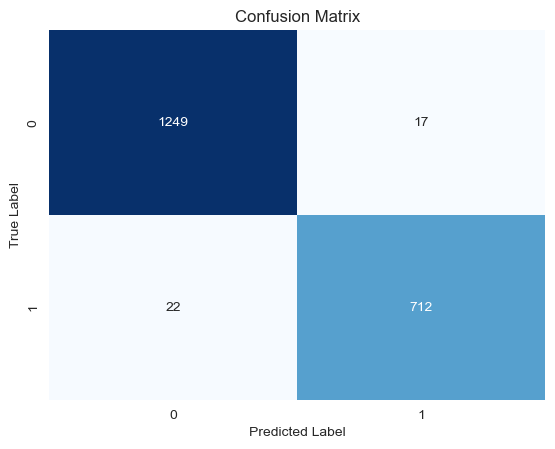

In [45]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Important Features

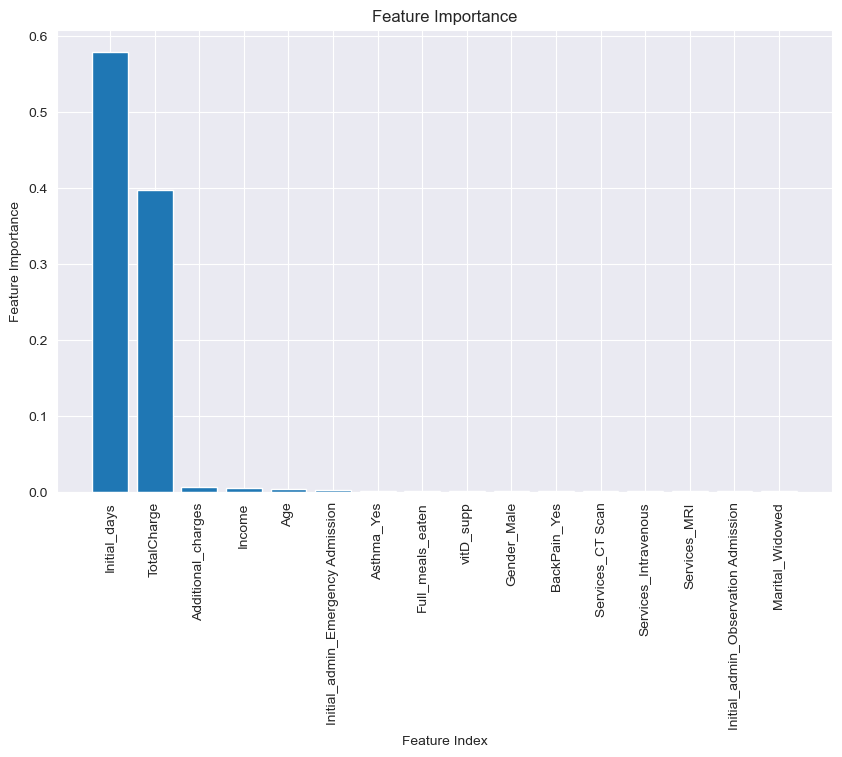

In [46]:
feature_names = X_train.columns                             # Pull names from train data
importances = rf_bparams.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]),sorted_feature_names, rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.show()